# Sandpile model simulaition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
class Sandpile:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.grid = np.zeros((grid_size, grid_size))
        self.data = []
        self.data_t = []

    def find_high_piles(self):
        x, y = np.where(self.grid >= 4)
        return list(zip(x, y))

    def topple(self):
        unstable = True
        t = 0
        num_affected_squares = 0
        while unstable:
            high_piles_coords = self.find_high_piles()
            t += 1 
            num_affected_squares += len(high_piles_coords)
            for x, y in high_piles_coords:
                self.grid[x, y] -= 4
                if x > 0: self.grid[x-1, y] += 1
                if x < self.grid_size - 1: self.grid[x+1, y] += 1
                if y > 0: self.grid[x, y-1] += 1
                if y < self.grid_size - 1: self.grid[x, y+1] += 1
                        
            if len(self.find_high_piles()) == 0:
                unstable = False
        self.data_t.append(t)
        self.data.append(num_affected_squares)


    def add_sand(self, x, y, grains=1):
        self.grid[x, y] += grains
        self.topple()
            

In [86]:
grid_size = 50
num_grains = 50000
sandpile = Sandpile(grid_size)
coordinates = np.random.randint(0, grid_size, size=(num_grains, 2))
#coordinates = [[grid_size//2, grid_size//2] for a in range(num_grains)]
for coord in tqdm(coordinates):
    sandpile.add_sand(coord[0], coord[1])



100%|██████████| 50000/50000 [00:15<00:00, 3295.44it/s]


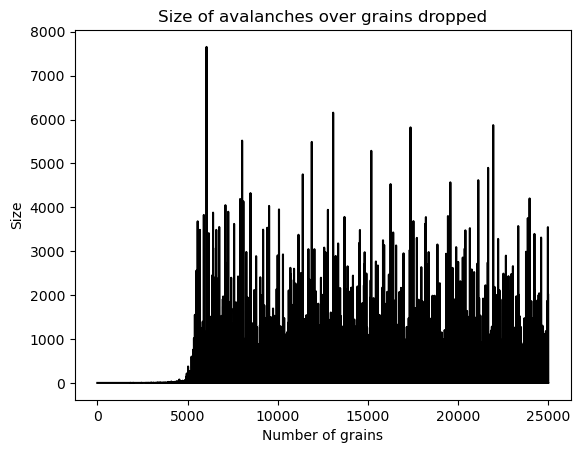

In [3]:
import matplotlib.pyplot as plt

plt.plot(sandpile.data, color = "black")

plt.xlabel('Number of grains')
plt.ylabel('Size')
plt.title('Size of avalanches over grains dropped')
plt.show()
plt.show()


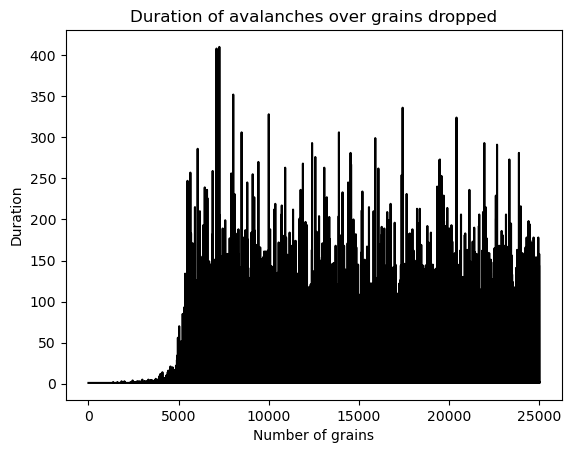

In [4]:
import matplotlib.pyplot as plt

plt.plot(sandpile.data_t, color = "black")

plt.xlabel('Number of grains')
plt.ylabel('Duration')
plt.title('Duration of avalanches over grains dropped')
plt.show()
plt.show()


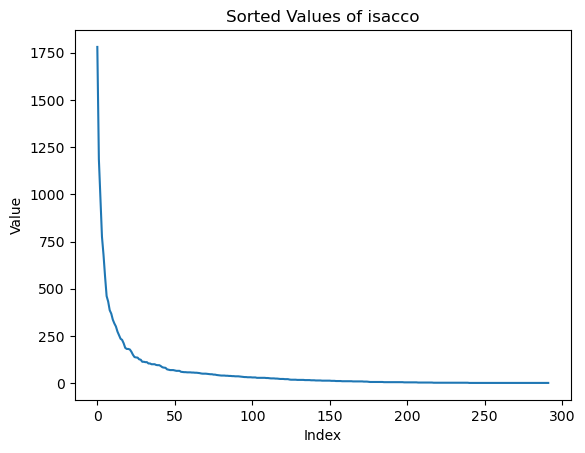

Number of unique keys: 292


In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the dictionary
isacco = {}

# Filter the data and populate the dictionary
d = [k for k in sandpile.data_t if k != 1]
for v in d:
    if v not in isacco:
        isacco[v] = 1
    else:
        isacco[v] += 1

# Plot the sorted values in descending order
plt.plot(sorted(isacco.values(), reverse=True))
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Sorted Values of isacco')
plt.show()

# Print the number of unique keys in the dictionary
print(f"Number of unique keys: {len(isacco.keys())}")
#
## Process data: collect keys with values from 1 to 10 and remove them from the dictionary
#for value in range(1, 100):
#    process_data = []
#    for key in list(isacco.keys()):
#        if isacco[key] == value:
#            process_data.append(key)
#            del isacco[key]
#
#    # Calculate the mean of the keys with the current value and add this as a new key to the dictionary
#    if process_data:
#        new_key = np.mean(process_data)
#        isacco[new_key] = value
#
## Output the final dictionary for verification
#print(f"Final dictionary: {isacco}")

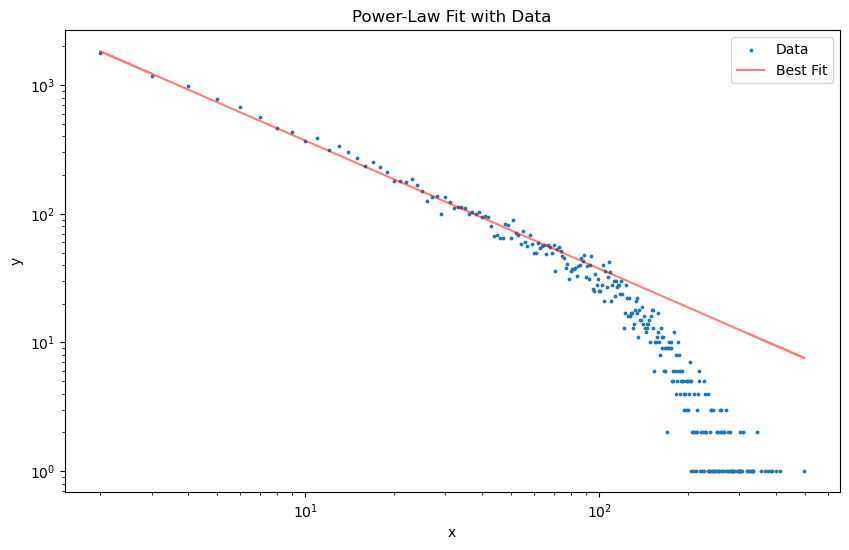

Kolmogorov-Smirnov statistic: 0.2568
p-value: 0.0000
[1186, 1781, 980, 775, 679, 564, 368, 461, 432, 336, 229, 300, 386, 316, 136, 273, 254, 181, 235, 181, 211, 124, 135, 100, 104, 43, 50, 113, 36, 178, 111, 126, 95, 166, 45, 96, 138, 100, 90, 42, 71, 69, 51, 60, 28, 55, 6, 150, 15, 82, 2, 40, 57, 16, 9, 67, 28, 9, 28, 81, 84, 53, 15, 104, 1, 113, 25, 69, 48, 49, 33, 58, 28, 57, 65, 13, 10, 59, 31, 5, 17, 10, 187, 39, 1, 100, 35, 10, 95, 10, 39, 8, 36, 111, 1, 32, 50, 16, 10, 37, 22, 38, 38, 65, 12, 31, 4, 56, 26, 32, 7, 55, 9, 4, 73, 8, 30, 56, 9, 45, 58, 16, 65, 41, 22, 27, 22, 69, 6, 1, 4, 21, 18, 14, 57, 40, 24, 2, 34, 30, 11, 1, 5, 54, 12, 9, 15, 4, 14, 23, 24, 17, 16, 6, 4, 21, 47, 8, 6, 31, 28, 12, 40, 47, 2, 11, 21, 28, 9, 2, 36, 17, 5, 1, 18, 25, 50, 5, 5, 17, 2, 27, 37, 2, 3, 18, 5, 13, 1, 6, 19, 10, 18, 4, 6, 30, 11, 17, 13, 5, 1, 1, 11, 13, 25, 14, 4, 14, 3, 3, 2, 1, 1, 3, 1, 2, 3, 1, 5, 4, 9, 2, 2, 13, 1, 6, 3, 1, 1, 10, 3, 1, 1, 1, 2, 13, 2, 2, 1, 3, 1, 5, 3, 2, 2, 1, 1, 

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import kstest

# Define the power-law function
def power_law(x, a, b):
    return a * x**(-b)

x_data = (list(isacco.keys()))

y_data = (list(isacco.values()))
#y_data = y_data / sum(y_data)  # Normalize the data



# Fit the power-law model to the data
popt, _ = curve_fit(power_law, x_data, y_data)

# Extract the optimal parameters
a_opt, b_opt = popt

# Generate fitted curve data
y_fit = power_law(np.array(x_data), a_opt, b_opt)

# Plot the data and the fit on a log-log scale
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, s=3, label='Data')
#plt.plot(y_data, label='Data')

plt.plot(x_data, y_fit, color='red', label=f'Best Fit', alpha = 0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Power-Law Fit with Data')
plt.legend()
plt.show()

# Perform the KS test comparing the normalized data to the power-law distribution
cdf_empirical = np.cumsum(y_data) / np.sum(y_data)
cdf_theoretical = np.cumsum((np.array(x_data) ** (-b_opt)) / np.sum(np.array(x_data) ** (-b_opt)))

ks_statistic, p_value = kstest(cdf_empirical, cdf_theoretical)

# Print the results
print(f"Kolmogorov-Smirnov statistic: {ks_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

print(y_data)